In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
os.listdir()

['.git',
 '1.LinearRegression.ipynb',
 '2.LogisticRegression.ipynb',
 '3.DecisionTrees&RandomForest.ipynb',
 '4.HowToApproachMachineLearningProjects.ipynb',
 'data',
 'models',
 'projects',
 'README.md']

In [7]:
ross_df = pd.read_csv('data/rossman/train.csv')
ross_df.head()

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_3868\649192046.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('data/rossman/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
store_df = pd.read_csv('data/rossman/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
merged_df = ross_df.merge(store_df,how= 'left',on = 'Store')
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
test_df = pd.read_csv('data/rossman/test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [11]:
merged_test_df = test_df.merge(store_df, how='left', on = 'Store')
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [14]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [15]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

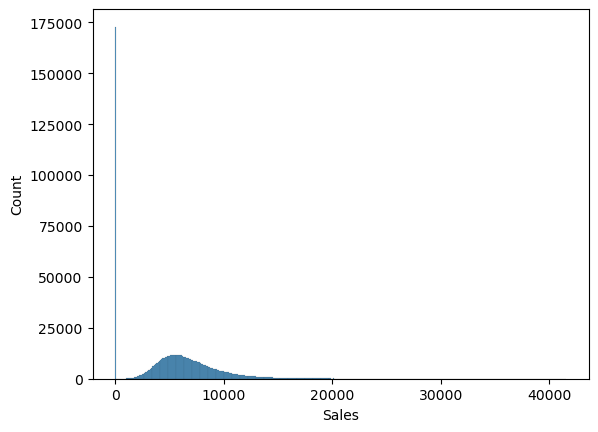

In [16]:
#EDA
sns.histplot(data= merged_df, x= 'Sales')
plt.show()
#When store closed, then sales = 0

In [17]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [18]:
merged_df = merged_df[merged_df.Open == 1].copy()

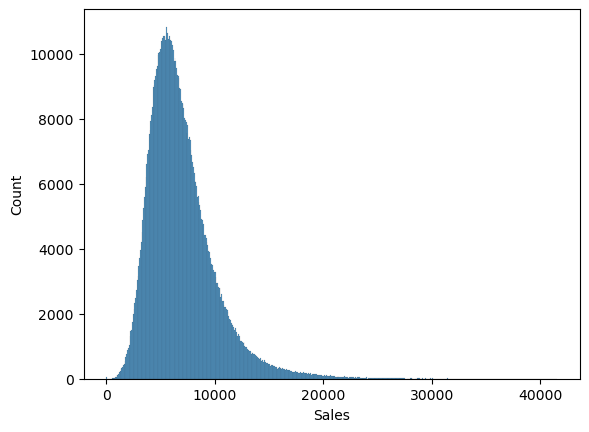

In [19]:
sns.histplot(data= merged_df, x= 'Sales')
plt.show()

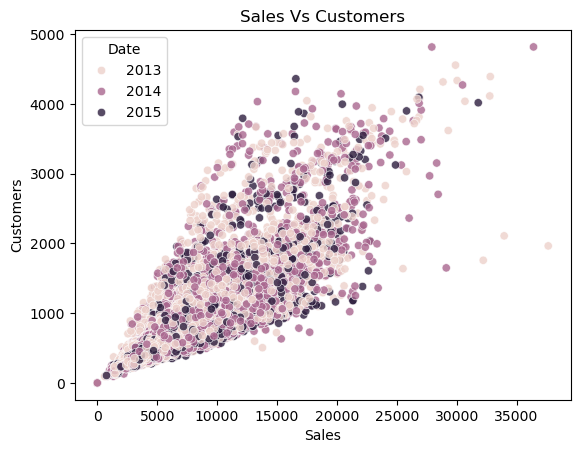

In [20]:
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

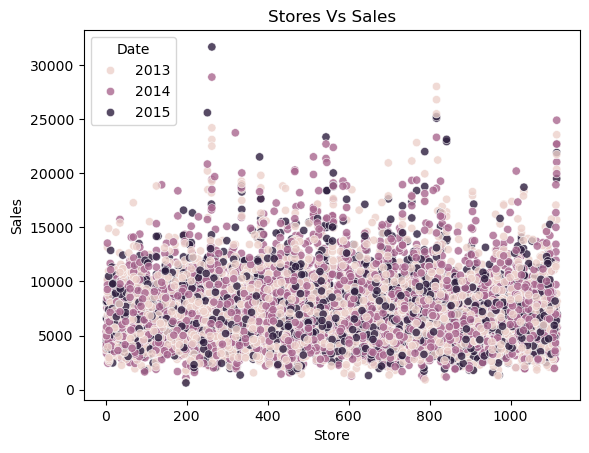

In [21]:
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

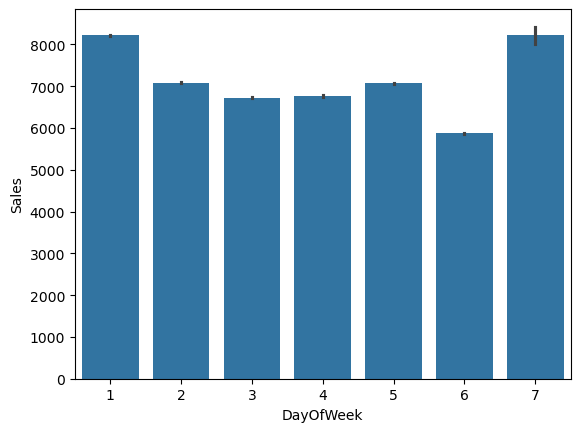

In [22]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

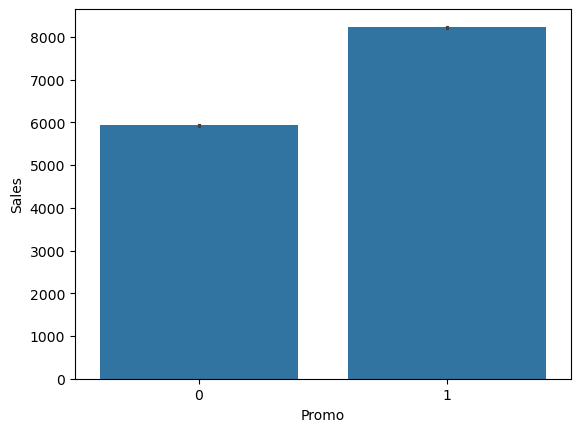

In [23]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [24]:
merged_df.corr(numeric_only=True)['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

In [25]:
#Feature Engineering
merged_df['Day']= merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [26]:
merged_test_df['Day']= merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

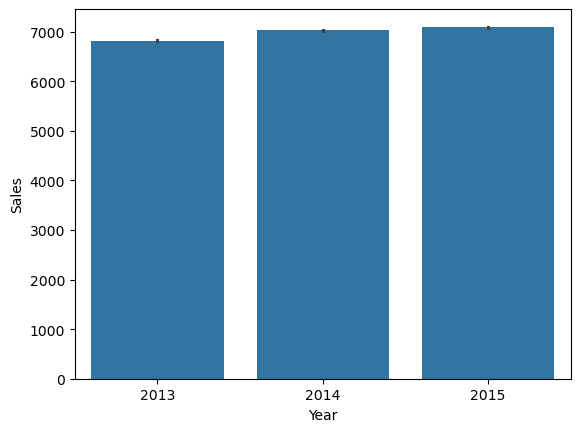

In [27]:
sns.barplot(data= merged_df,x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

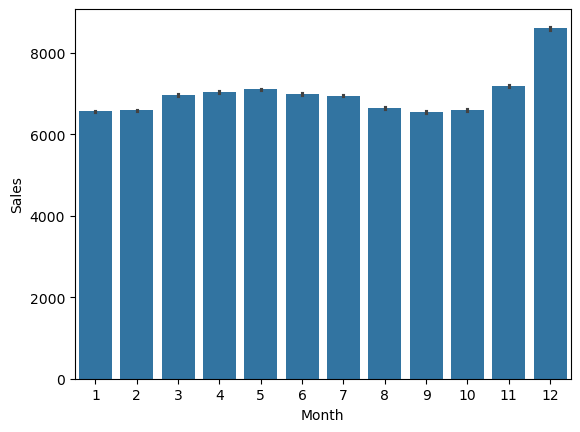

In [28]:
sns.barplot(data=merged_df, x= 'Month', y='Sales')

<Axes: xlabel='Day', ylabel='Sales'>

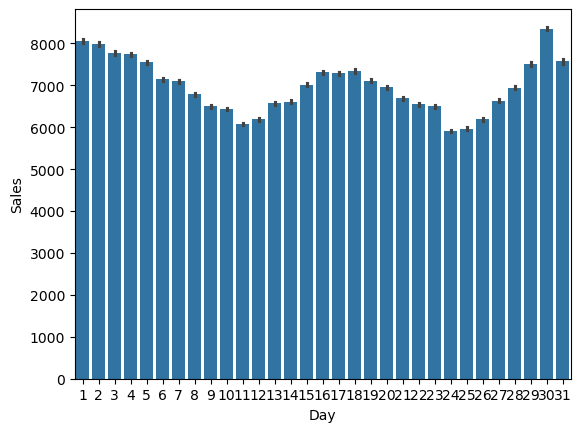

In [29]:
sns.barplot(data=merged_df, x= 'Day', y='Sales')

In [30]:
train_size = int(.75*len(merged_df))
sorted_df = merged_df.sort_values('Date')
train_df , val_df = sorted_df[:train_size],sorted_df[train_size:]

In [31]:
train_df.Date.min(),train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [32]:

val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [33]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [34]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday','StoreType','Assortment','Day','Month','Year']
target_cols = 'Sales'

In [35]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       5
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [36]:
##Here we'll treat the store column as a Numerical column knowing it is a categorical column but still, linear models will struglle but decision trees may figure it out,

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = merged_test_df[input_cols].copy()

In [37]:
numeric_cols = ['Store','Day','Month','Year']
categorical_cols = ['DayOfWeek','Promo','StateHoliday','StoreType','Assortment']

In [38]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [39]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [40]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [41]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [42]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].astype(str)
val_inputs[categorical_cols] = val_inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [43]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [44]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols+ encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [45]:
#Baseline Model, here just return the mean of the sale of the past 3 year

def return_mean(inputs):
  return np.full(len(inputs),merged_df.Sales.mean())

In [46]:
train_preds = return_mean(X_train)
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076], shape=(633294,))

In [47]:
root_mean_squared_error(train_preds,train_targets)

3082.4504432774193

In [48]:
#Basline Linear Regression
linreg = LinearRegression()

In [49]:
linreg.fit(X_train,train_targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
train_preds = linreg.predict(X_train)

In [51]:
root_mean_squared_error(train_preds,train_targets)

2741.5871919165784

In [52]:
val_preds = linreg.predict(X_val)

In [53]:
root_mean_squared_error(val_preds,val_targets)

2817.7797940117125

In [54]:
def try_model(model):
  model.fit(X_train,train_targets)

  train_preds= model.predict(X_train)
  val_preds= model.predict(X_val)
  
  train_rmse = root_mean_squared_error(train_preds,train_targets)
  val_rmse = root_mean_squared_error(val_preds,val_targets)
  return train_rmse,val_rmse

In [55]:
try_model(LinearRegression())

(2741.5871919165784, 2817.7797940117125)

In [56]:
try_model(Ridge())

(2741.5871950814435, 2817.7784665409345)

In [57]:
try_model(Lasso())

(2741.714390464056, 2817.9472924045217)

In [58]:
try_model(ElasticNet())

(2879.0432103903954, 2972.6658860503385)

In [59]:
try_model(SGDRegressor())

(2742.9544346134626, 2810.0212883105255)

In [60]:
tree = DecisionTreeRegressor(random_state=67)
try_model(tree)

(0.0, 1600.0432475632947)

In [63]:
tree = RandomForestRegressor(random_state=67,n_jobs=-1)
try_model(tree)

(474.59146153915657, 1375.3649136854485)

In [64]:
tree.feature_importances_

array([6.08174357e-01, 4.88702320e-02, 4.71410328e-02, 9.31499982e-03,
       3.36483834e-02, 4.38228493e-03, 2.44095656e-03, 2.08589397e-03,
       5.68145378e-03, 6.94660247e-03, 4.45917196e-03, 5.56037217e-02,
       8.33787855e-02, 1.17356833e-03, 2.19280202e-04, 2.46265560e-05,
       1.78227825e-05, 1.36498490e-02, 2.26004746e-02, 1.05711440e-02,
       1.33291185e-02, 8.22277393e-03, 5.45355767e-03, 1.26099083e-02])

In [65]:
importance_df = pd.DataFrame({
  'feature' : numeric_cols + encoded_cols,
  'importance' : tree.feature_importances_
}).sort_values('importance', ascending= False)
importance_df.head()

,feature,importance
0,Store,0.608174
12,Promo_1,0.083379
11,Promo_0,0.055604
1,Day,0.048870
2,Month,0.047141


<Axes: xlabel='importance', ylabel='feature'>

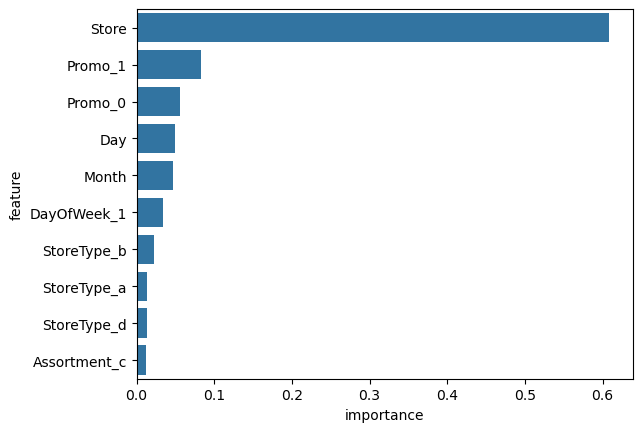

In [66]:
sns.barplot(data = importance_df.head(10), x = 'importance', y='feature')

In [67]:
def predict_input(model, single_input):
  if single_input['Open' ] == 0:
    return 0
  input_df = pd.DataFrame([single_input])
  input_df['Date'] = pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  return pred
  


### This sections discusses how to do submission for a kaggle competition

In [68]:
test_preds = tree.predict(X_test)
test_preds

array([ 4240.  ,  7779.24,  8851.12, ...,  6138.89, 20990.5 ,  6742.76],
      shape=(41088,))

In [70]:
submission_df = pd.read_csv('data/rossman/sample_submission.csv')
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [75]:
submission_df['Sales'] = test_df['Open'].fillna(1).astype('int') * test_preds

In [76]:
submission_df.fillna(0,inplace=True)
submission_df

,Id,Sales
0,1,4240.00
1,2,7779.24
2,3,8851.12
3,4,6724.16
4,5,6570.79
...,...,...
41083,41084,3108.01
41084,41085,9014.28
41085,41086,6138.89
41086,41087,20990.50


In [78]:
submission_df.to_csv('data/rossman/submission.csv',index = None)